In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm
%matplotlib inline

# Part 1

## Exercise 1

Consider the data set below

In [2]:
data = np.array([[ 2.44236222e+00, 3.30250429e+00, -9.81109783e-01, 6.78614701e+00, 3.63657906e+00, -1.38601115e-01, 2.69622469e+00, 2.63966828e+00, 2.69684716e+00, -1.46069376e+00, -1.42529269e+00, -2.88140725e+00, -2.23786907e+00, -2.57420367e+00, 1.48027834e+00, 2.41198748e+00, 4.54343844e+00, 2.76042020e+00, -2.28201549e+00, 2.15343916e-01, -6.13067236e+00, 4.86214391e+00, 1.45603838e+00, -1.64701900e+00, 3.36347098e+00, 9.29048836e-01, 3.83243079e-01, 8.21992554e-01, 6.43777638e-01, 3.54669847e+00, 3.21405361e+00, -2.21792733e-01, -1.72210672e+00, -3.65593567e+00, 4.05117254e+00, -2.24175989e+00, 6.63000157e-01, 7.15388493e+00, -2.56802307e+00, -2.13005343e-01, 1.01927703e+01, 2.25065027e+00, 1.56475571e-01, 3.78481588e+00, 2.20193162e+00, 7.85840438e-01, 3.09702668e+00, 6.90887130e+00, 2.45456261e+00, 5.64153462e-01, -7.81053108e-01, -4.64191483e-01, 1.06433047e-01, 1.96193555e-01, 8.21659089e-01, 3.10614609e+00, 3.07210440e+00, -8.23083048e-01, 7.28914176e+00, 1.72719868e+00, 4.32577347e+00, 5.27348650e-01, 4.07428687e+00, 2.85350380e+00, 1.07269472e+00, -3.98057134e+00, 7.32957498e+00, 1.52681221e+01, 1.83165612e-01, 3.25085754e+00, 1.95252906e+00, -3.01022224e+00, 1.93980260e+00, -1.50200218e+00, -3.27049341e+00, 3.51200145e-01, 4.80177633e+00, 9.81592566e+00, 3.23078874e+00, 5.05651324e+00, 2.45879154e+00, 5.13923296e+00, -1.58200145e-01, 2.12584122e+00, 4.06413642e+00, 2.68426217e+00, -4.53329976e+00, 4.74174070e+00, -2.53630881e+00, 4.76708670e+00, 6.88914829e+00, -3.40332196e+00, 6.42673522e+00, 6.10873553e+00, 1.14247184e+00, 4.40597953e+00, 4.66111642e+00, 5.18581045e-03, 4.92184090e+00, -2.42357354e-01]])

Assume a Gaussian distribution for the data.
* Calculate maximum likelihood estimates for the paarmeters
* Visualize the data and the model

mean:  1.8490585723745
variance:  11.712950236843055


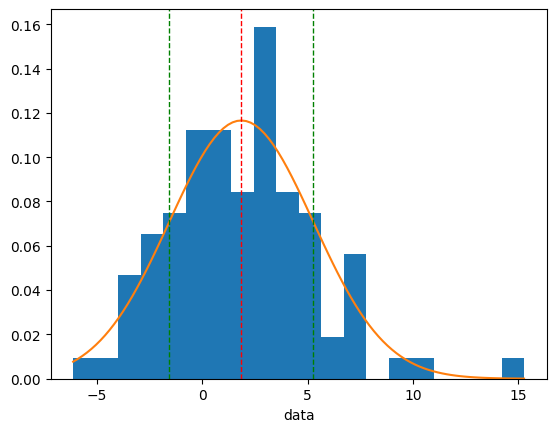

In [3]:
#maximum likelihood estimation
def mle(data):
    a = np.mean(data)
    b = np.var(data)
    return a, b

mean, var = mle(data)
print("mean: ", mean)
print("variance: ", var)

#plotting the histogram of the data and the normal distribution over it using linspace
plt.hist(data[0], bins=20, density=True)
x = np.linspace(min(data[0]), max(data[0]), 100)
plt.plot(x, norm.pdf(x, mean, np.sqrt(var)))
#add the mean and variance to the plot
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean + np.sqrt(var), color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean - np.sqrt(var), color='g', linestyle='dashed', linewidth=1)
plt.xlabel("data")

plt.show()




## Exercise 2 

Consider a poker game consisting of two rounds, and where each player is initially dealt three cards. During the first round all three cards can be changed (FC), but during the second round at most two cards can be changed (SC). When deciding on whether to call or fold you can taken into account the number of cards changed by your opponent as well as your current hand (MH). After playing 20 games we have the results below, where BH shows who has the best hand.

In [4]:
df = pd.read_csv('poker_data.csv')
print(df)

      BH   MH  FC  SC
0     op   no   3   1
1     op   1a   2   1
2   draw   2v   1   1
3     me   2a   1   1
4   draw   fl   1   1
5     me   st   3   2
6     me   3v   1   1
7     me  sfl   1   0
8     op   no   0   0
9     op   1a   3   2
10  draw   2v   2   1
11    me   2v   3   2
12    op   2v   1   1
13    op   2v   3   0
14    me   2v   3   2
15  draw   no   3   2
16  draw   2v   1   1
17    op   fl   1   1
18    op   no   3   2
19    me   1a   3   2


* Construct a naive Bayes classifier for the poker domain. 
* Use the data cases to learn the maximum likelihood parameters in the model; if you feel comfortable with the estimation procedure, you only need to estimate the probabilities required for solving the exercise below. 
* What is the posterior distribution of BH given MH=1a, FC=1, and SC=1? 
* Do you see any potential issues with the posterior and how could you address it?

In [5]:
# Hint: You can calculate counts using, e.g.:
df[(df.FC==1) & (df.BH=='me')].shape[0]

3

# Part 2

In [6]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold
from scipy.stats import multivariate_normal

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the iris data set
iris = datasets.load_iris()

# Prepare data ...
X_train = iris.data
y_train = iris.target
print(f'Number of data points: {X_train.shape[0]}')

Number of data points: 150


In [8]:
# and set the scene
num_clusters = 3
colors = ['r', 'g', 'b']
covariance_type = 'full' #‘full’, ‘tied’, ‘diag’, ‘spherical’

In [9]:
# For the contour plots
min_x, max_x = np.min(X_train[:,0]), np.max(X_train[:,0])
min_y, max_y = np.min(X_train[:,1]), np.max(X_train[:,1])
N = 200
X = np.linspace(min_x, max_x, N)
Y = np.linspace(min_y, max_y, N)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))

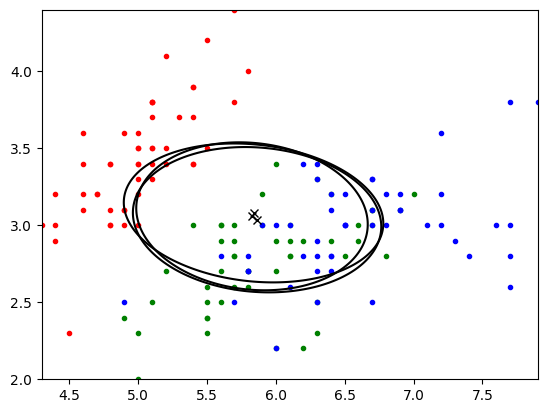

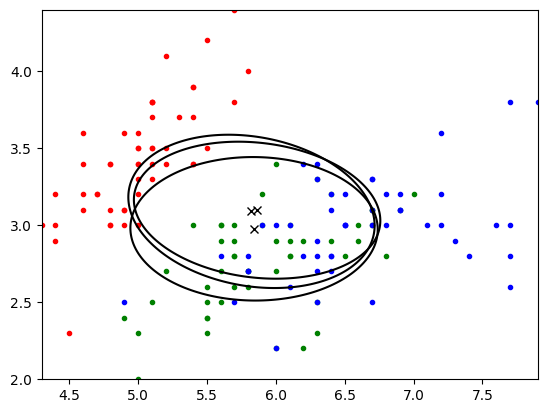

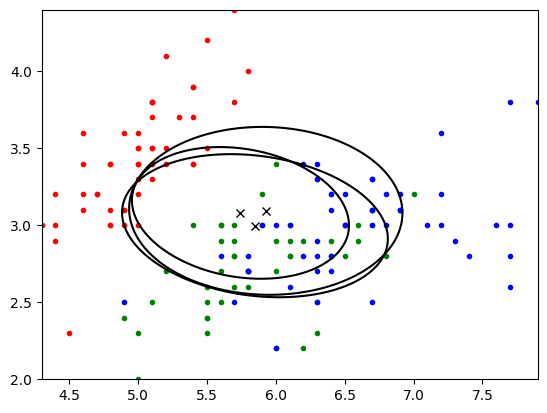

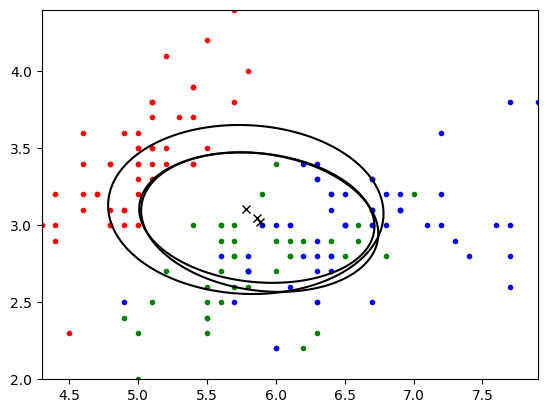

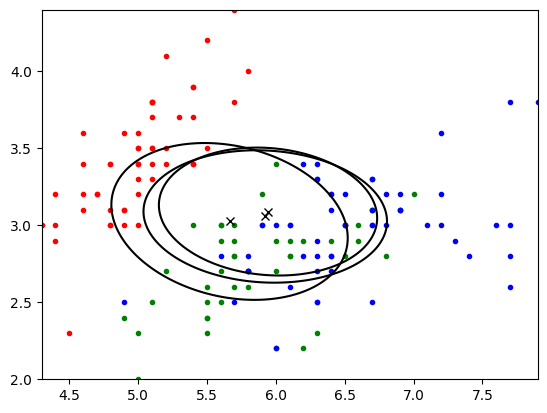

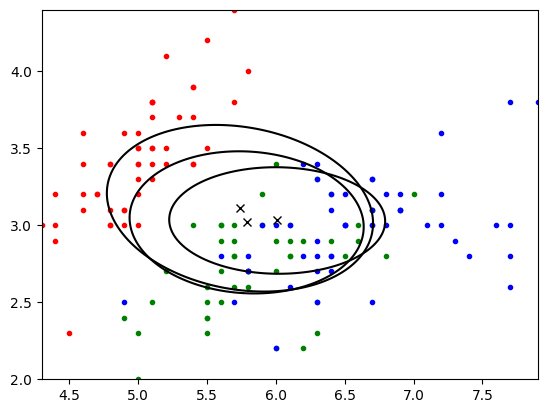

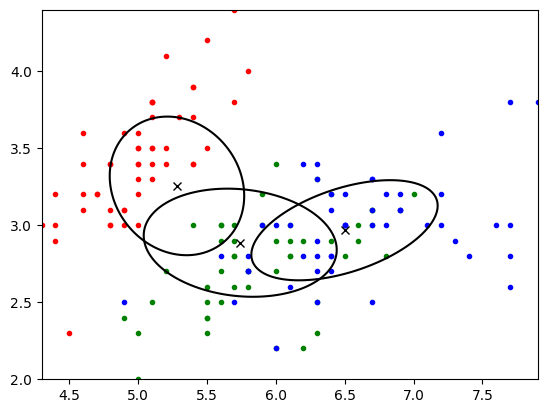

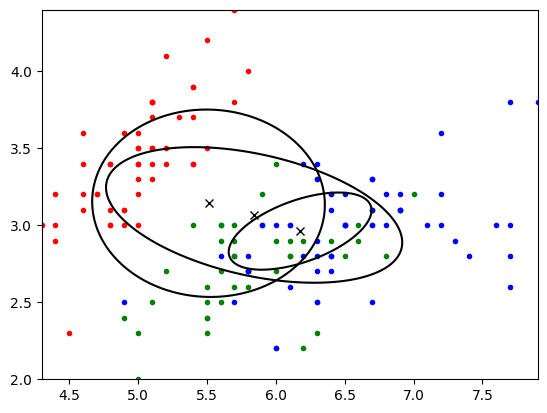

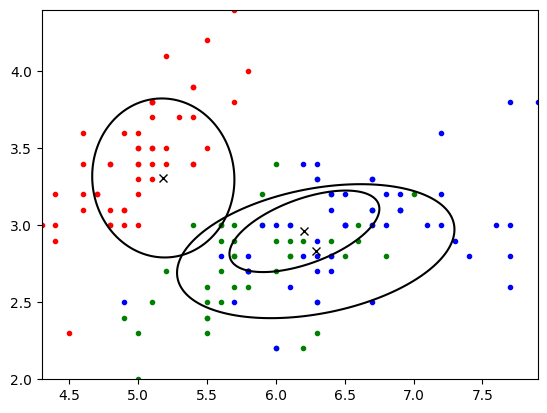

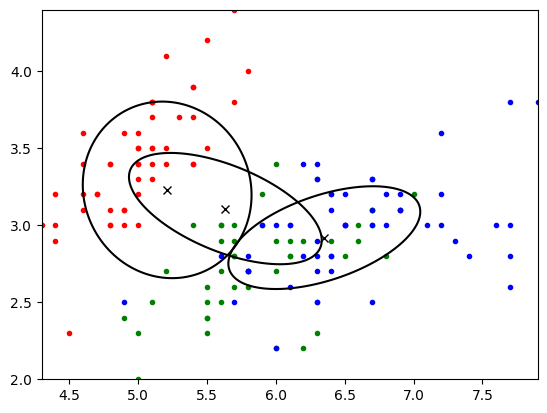

In [10]:
# And now play around
num_iter = range(0, 10)
        
for i in num_iter:
    for idx, color in enumerate(colors):
        plt.plot(X_train[y_train==idx, 0], X_train[y_train==idx,1], '.', color=color)

    gmm = GaussianMixture(n_components=num_clusters, init_params='random', max_iter = i, covariance_type=covariance_type)
    gmm.fit(X_train)
    for idx in range(num_clusters):
        plt.plot(gmm.means_[idx, 0], gmm.means_[idx, 1], 'x', color='black')

        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[idx][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[idx][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[idx]

        rv = multivariate_normal(gmm.means_[idx,:2], covariances)
        Z = rv.pdf(pos)

        plt.contour(X, Y, Z, levels=1, colors='black')

    plt.show()

### Exercise

Perform one more iteration of the EM-algorithm in the example on Slide 24. You may consider using Python or Hugin to calculate the required probabilities. 

# Part 3

In the thumbtack experiment, let the *unnormalized*
prior distribution for $\theta$ be

$$f(\theta) =
\begin{cases}
\theta\text{ if }\theta \le 1/2\\
(1-\theta)\text{ if }1/2\le \theta \le 1
\end{cases}
$$

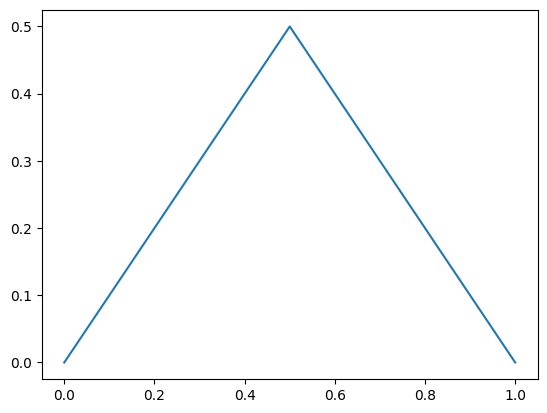

In [12]:
x = np.linspace(0,1,10000)
y = np.array([xp if xp <= 0.5 else (1-xp) for xp in x])
plt.plot(x,y)
plt.show()

### Exercise 

What is the normalization constant for the prior distribution?

Assume that we have performed one experiment resulting in $up$. What is now the posterior distribution for
$\theta$? Comparing your result with the prior distribution, do you see any challenges with the current model specification? 

# Part 4

Reconsider the thumbtack model above, but replace the prior distribution over $\theta$ and a Beta distribution chosing suitable hyperparameters of your own chosing.

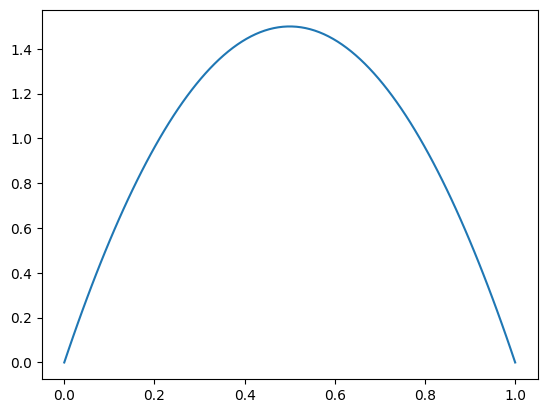

In [13]:
x = np.linspace(0,1,100)
y = beta.pdf(x,2,2)
plt.plot(x,y)

* What is the posterior distribution after seeing *pin up*? 

* How does the functional form compare to the posteror under the original prior distribution?

* How could you summarize the posterior distribution?

* Calculate the posterior predictive distribtion?